In [384]:
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation, Flatten
from keras.layers import Conv1D, LSTM, Dropout, Bidirectional,LayerNormalization
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [385]:
df = pd.read_csv('./data/pamap2.csv', index_col=0)

In [386]:
df.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [387]:
hand = ['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3','activityID'];
h_features = df[hand]


chest = ['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3','activityID']
c_features = df[chest]

In [388]:
from collections import Counter

Counter(h_features['activityID'])

Counter({1: 17575,
         2: 16881,
         3: 17256,
         12: 10699,
         13: 9585,
         4: 20998,
         7: 16857,
         5: 8665})

In [389]:
label_encode = LabelEncoder()
h_features['activityID'] = label_encode.fit_transform(h_features['activityID'])
c_features['activityID'] = label_encode.fit_transform(c_features['activityID'])

In [390]:
h_features

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,activityID
2932,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.18250,-20.0857,0
2943,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.39360,-20.5508,0
2954,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.08980,-21.2481,0
2965,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.08820,-20.8997,0
2976,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.14860,-20.1947,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,0.012003,-0.026437,17.71230,-4.80473,-41.8342,4
2818413,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,0.038150,0.059271,18.33580,-5.21004,-41.4393,4
2818423,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,0.034051,0.008866,17.71400,-4.92892,-41.8335,4
2818435,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,0.034565,-0.001782,18.08540,-4.82465,-41.8349,4


In [391]:
c_features

,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,activityID
2932,0.352225,9.72437,-1.686650,0.173568,9.69512,-1.534140,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.92280,0
2943,0.125825,9.72560,-1.613310,0.143761,9.71023,-1.503690,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.64950,0
2954,0.199567,9.64954,-1.689170,0.083704,9.75569,-1.533420,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.17650,0
2965,0.279626,9.80069,-1.572050,0.114698,9.78564,-1.412620,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.29430,0
2976,0.428255,9.64882,-1.685030,0.218926,9.60427,-1.398660,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.68360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,-2.176960,9.63375,0.397475,-2.399840,9.77329,0.703170,0.019680,0.018043,-0.013087,21.723400,-30.6849,8.91800,4
2818413,-2.145710,9.63208,0.165721,-2.266810,9.53169,0.565652,0.056830,-0.038897,0.005755,21.973900,-29.9201,8.63339,4
2818423,-1.882640,9.51751,0.054697,-2.161590,9.57682,0.504698,-0.060698,-0.026238,0.049355,21.971700,-30.6947,9.48380,4
2818435,-1.867470,9.63384,0.557966,-2.128490,9.69697,0.882662,-0.025373,0.022089,0.019818,21.863500,-30.8185,8.35572,4


In [392]:
df['activityID'].value_counts()

4     20998
1     17575
3     17256
2     16881
7     16857
12    10699
13     9585
5      8665
Name: activityID, dtype: int64

In [393]:
def split_sequences(sequences, time_steps, steps=1):
    X, y = list(), list()
    for i in range(0, len(sequences), steps):

        end_ix = i + time_steps

        if end_ix > len(sequences):
            break

        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [394]:
from sklearn.model_selection import train_test_split

hand_train, hand_test = train_test_split(h_features, test_size = 0.2, shuffle = True, random_state = 42)
chest_train, chest_test = train_test_split(c_features, test_size = 0.2, shuffle = True, random_state = 42)

In [395]:
train_hand_set = np.array(hand_train)
test_hand_set = np.array(hand_test)
train_chest_set = np.array(chest_train)
test_chest_set = np.array(chest_test)

In [396]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_hand_set[:,:-1] = scaler.fit_transform(train_hand_set[:,:-1])
test_hand_set[:,:-1] = scaler.transform(test_hand_set[:,:-1])
scaler = StandardScaler()
train_chest_set[:,:-1] = scaler.fit_transform(train_chest_set[:,:-1])
test_chest_set[:,:-1] = scaler.transform(test_chest_set[:,:-1])

In [397]:
train_hand_set

array([[-0.54092897,  0.10380076, -0.73884228, ..., -0.5560904 ,
         1.27176936,  2.        ],
       [-0.86312543, -0.31053269, -0.87322845, ..., -0.50051732,
        -0.58507136,  3.        ],
       [ 0.48784377, -0.02397468,  1.58600692, ...,  0.11276476,
        -0.42953786,  1.        ],
       ...,
       [ 1.63993141, -0.75149615,  1.02667317, ...,  0.21844729,
         0.31023801,  0.        ],
       [ 0.78554211,  0.28854086,  1.31489252, ...,  1.23330375,
        -0.99850321,  0.        ],
       [ 1.70721208, -0.04603599,  0.82085369, ...,  0.51458017,
        -1.31209267,  0.        ]])

In [398]:
TIMESTEPS = 15;
STEPS = 5;

X_train_h, y_train_h = split_sequences(train_hand_set, TIMESTEPS, STEPS)
print(X_train_h.shape, y_train_h.shape)

X_test_h, y_test_h = split_sequences(test_hand_set, TIMESTEPS, STEPS)
print(X_test_h.shape, y_test_h.shape)

X_train_c, y_train_c = split_sequences(train_chest_set, TIMESTEPS, STEPS)
print(X_train_c.shape, y_train_c.shape)

X_test_c, y_test_c = split_sequences(test_chest_set, TIMESTEPS, STEPS)
print(X_test_c.shape, y_test_c.shape)

(18960, 15, 12) (18960,)
(4738, 15, 12) (4738,)
(18960, 15, 12) (18960,)
(4738, 15, 12) (4738,)


In [399]:
y_train_h = to_categorical(y_train_h)
y_test_h = to_categorical(y_test_h)
y_train_c = to_categorical(y_train_c)
y_test_c = to_categorical(y_test_c)

In [400]:
y_train_h.shape,y_test_h.shape,y_train_c.shape,y_train_c.shape

((18960, 8), (4738, 8), (18960, 8), (18960, 8))

In [401]:
batch_size = 64
validation_split = 0.2
epochs = 30

In [402]:
def display_results(testy,predictions,classNames):
    y_test=np.argmax(testy, axis=1)
    y_scores=np.argmax(predictions, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_testh, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_testh, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y] #/np.sum(cm[x,:])

    plt.figure(figsize=(10,8))
    df = sns.heatmap(con, annot=True, fmt='g', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Train set: Hand / Test set: Hand

In [403]:
n_timesteps, n_features, n_outputs = X_train_h.shape[1], X_train_h.shape[2], y_train_h.shape[1]
print(n_timesteps, n_features, n_outputs)

15 12 8


In [404]:
model1 = Sequential()
model1.add(LSTM(64, input_shape = [n_timesteps, n_features], return_sequences=True))
model1.add(LSTM(32))
model1.add(Dropout(0.3))

model1.add(Dense(16, activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(n_outputs, activation = "softmax"))

In [405]:
model1.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])
model1.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 15, 64)            19712     
                                                                 
 lstm_24 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dropout_38 (Dropout)        (None, 16)                0         
                                                                 
 dense_71 (Dense)            (None, 8)                 136       
                                                                 
Total params: 32792 (128.09 KB)
Trainable params: 327

In [406]:
history = model1.fit(X_train_h, y_train_h, batch_size= batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/30
237/237 [==============================] - 12s 29ms/step - loss: 1.5726 - accuracy: 0.4236 - val_loss: 1.2234 - val_accuracy: 0.5414
Epoch 2/30
237/237 [==============================] - 5s 22ms/step - loss: 1.2085 - accuracy: 0.5907 - val_loss: 0.9680 - val_accuracy: 0.6912
Epoch 3/30
237/237 [==============================] - 6s 25ms/step - loss: 1.0127 - accuracy: 0.6702 - val_loss: 0.8704 - val_accuracy: 0.7091
Epoch 4/30
237/237 [==============================] - 6s 24ms/step - loss: 0.9228 - accuracy: 0.6970 - val_loss: 0.8254 - val_accuracy: 0.7292
Epoch 5/30
237/237 [==============================] - 5s 23ms/step - loss: 0.8553 - accuracy: 0.7194 - val_loss: 0.8345 - val_accuracy: 0.7329
Epoch 6/30
237/237 [==============================] - 5s 23ms/step - loss: 0.8024 - accuracy: 0.7358 - val_loss: 0.8015 - val_accuracy: 0.7447
Epoch 7/30
237/237 [==============================] - 6s 23ms/step - loss: 0.7631 - accuracy: 0.7446 - val_loss: 0.8096 - val_accuracy: 0.744

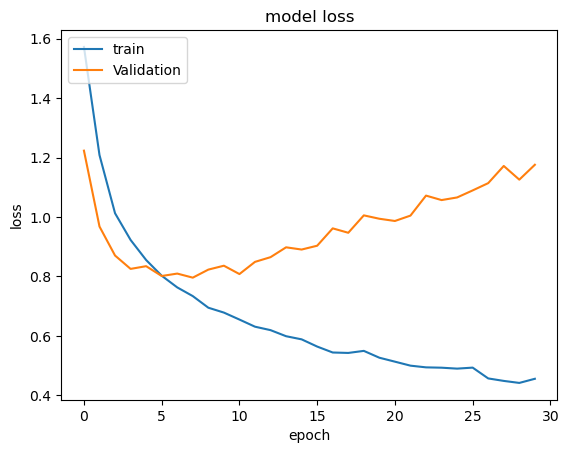

In [407]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

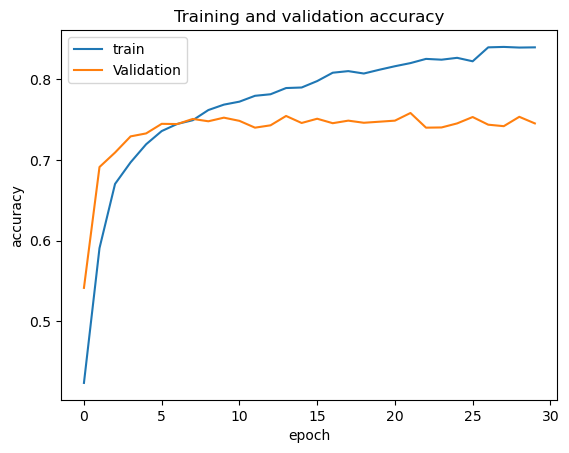

In [408]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

149/149 [==============================] - 2s 8ms/step
[[654   8   9   6   1   2   7  23]
 [  2 596  31   7   0  12   6  21]
 [  5  27 546  23   1  17  19  43]
 [  2  11  15 723   1  45  52  36]
 [  1   9  10  15 277  21   4  13]
 [  0  22  14  68  20 474  19  18]
 [  3  16  17 148  12  31 119  91]
 [  7  14  29  71  12  24  47 161]]
0.7492612916842549
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       710
           1       0.85      0.88      0.87       675
           2       0.81      0.80      0.81       681
           3       0.68      0.82      0.74       885
           4       0.85      0.79      0.82       350
           5       0.76      0.75      0.75       635
           6       0.44      0.27      0.34       437
           7       0.40      0.44      0.42       365

    accuracy                           0.75      4738
   macro avg       0.72      0.71      0.71      4738
weighted avg       0.75      0.75      0.74      

<Axes: >

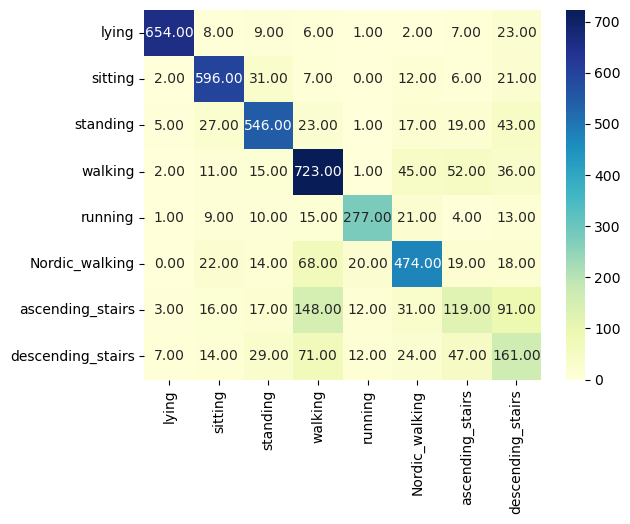

In [409]:
y_pred=model1.predict(X_test_h)
y_pred = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test_h, axis=-1)

LABELS = ['lying','sitting','standing','walking','running','Nordic_walking','ascending_stairs','descending_stairs']
cm=confusion_matrix(y_test2,y_pred)

print(cm)
print(accuracy_score(y_test2,y_pred))
print(classification_report(y_test2,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

## Train set: Hand / Test set: Chest

149/149 [==============================] - 1s 7ms/step
[[361   9  24  53   6   5  29 223]
 [ 89  78 173  17   5  10  27 276]
 [  9 147 170  38   4  84  47 182]
 [  6  70  53 142  84 284  98 148]
 [  4  11   4  49 164  84  10  24]
 [  4  43  30 116  78 243  62  59]
 [  6  39  15  96  51 108  47  75]
 [  9  36  14  84  57  64  45  56]]
0.26614605318699874
              precision    recall  f1-score   support

           0       0.74      0.51      0.60       710
           1       0.18      0.12      0.14       675
           2       0.35      0.25      0.29       681
           3       0.24      0.16      0.19       885
           4       0.37      0.47      0.41       350
           5       0.28      0.38      0.32       635
           6       0.13      0.11      0.12       437
           7       0.05      0.15      0.08       365

    accuracy                           0.27      4738
   macro avg       0.29      0.27      0.27      4738
weighted avg       0.31      0.27      0.28     

<Axes: >

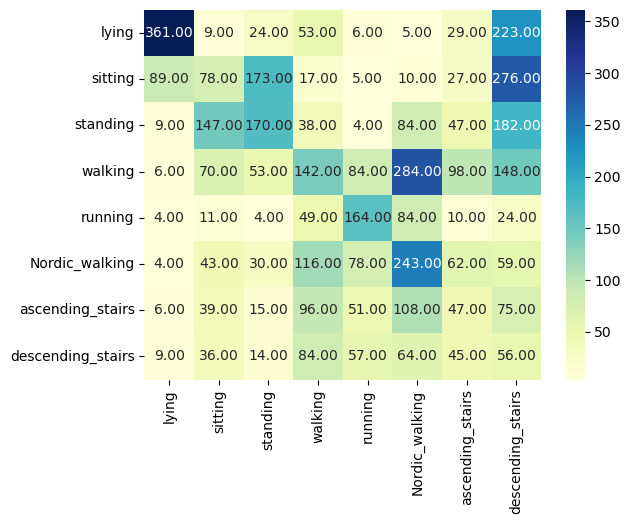

In [410]:
y_pred=model1.predict(X_test_c)
y_pred = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test_h, axis=-1)

LABELS = ['lying','sitting','standing','walking','running','Nordic_walking','ascending_stairs','descending_stairs']
cm=confusion_matrix(y_test2,y_pred)

print(cm)
print(accuracy_score(y_test2,y_pred))
print(classification_report(y_test2,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [411]:
pth_file1 = 'pamap2_hand.pth'
tf.keras.models.save_model(model1, pth_file1, include_optimizer=False)

INFO:tensorflow:Assets written to: pamap2_hand.pth\assets


INFO:tensorflow:Assets written to: pamap2_hand.pth\assets


## Fine tuning pretrained model with hands for chest model

In [412]:
base_model = keras.models.load_model(pth_file1)

In [413]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 2

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

new_model1 = Sequential(base_model.layers[:-1])
new_model1.add(Dense(8, activation="sigmoid"))
new_model1.add(Dense(n_outputs, activation="sigmoid"))

new_model1.summary()

Number of layers in the base model:  6
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 15, 64)            19712     
                                                                 
 lstm_24 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dropout_38 (Dropout)        (None, 16)                0         
                                                                 
 dense_72 (Dense)            (None, 8)                 136       
                                                                 
 dense_73 (Den

In [414]:
new_model1.compile(loss ="categorical_crossentropy", optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])

In [415]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_23,False
1,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_24,False
2,<keras.src.layers.regularization.dropout.Dropo...,dropout_37,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_70,True
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_38,True
5,<keras.src.layers.core.dense.Dense object at 0...,dense_71,True


In [416]:
history1 = new_model1.fit(X_train_c, y_train_c, batch_size= batch_size, epochs=20, validation_split=validation_split)

Epoch 1/20
237/237 [==============================] - 10s 22ms/step - loss: 1.7225 - accuracy: 0.3372 - val_loss: 1.5243 - val_accuracy: 0.3985
Epoch 2/20
237/237 [==============================] - 3s 14ms/step - loss: 1.5770 - accuracy: 0.3844 - val_loss: 1.4790 - val_accuracy: 0.4372
Epoch 3/20
237/237 [==============================] - 3s 14ms/step - loss: 1.5444 - accuracy: 0.4047 - val_loss: 1.4533 - val_accuracy: 0.4346
Epoch 4/20
237/237 [==============================] - 4s 15ms/step - loss: 1.5263 - accuracy: 0.4052 - val_loss: 1.4444 - val_accuracy: 0.4544
Epoch 5/20
237/237 [==============================] - 4s 15ms/step - loss: 1.5103 - accuracy: 0.4132 - val_loss: 1.4357 - val_accuracy: 0.4451
Epoch 6/20
237/237 [==============================] - 3s 14ms/step - loss: 1.5118 - accuracy: 0.4141 - val_loss: 1.4289 - val_accuracy: 0.4586
Epoch 7/20
237/237 [==============================] - 4s 15ms/step - loss: 1.5079 - accuracy: 0.4162 - val_loss: 1.4224 - val_accuracy: 0.462

In [417]:
base_model.trainable = True
new_model1.compile(loss ="categorical_crossentropy", optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])

In [418]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_23,True
1,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_24,True
2,<keras.src.layers.regularization.dropout.Dropo...,dropout_37,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_70,True
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_38,True
5,<keras.src.layers.core.dense.Dense object at 0...,dense_71,True


In [419]:
history2 = new_model1.fit(X_train_c, y_train_c, epochs=20, batch_size = batch_size, validation_split = validation_split, shuffle = True)

Epoch 1/20
237/237 [==============================] - 14s 30ms/step - loss: 1.3132 - accuracy: 0.4889 - val_loss: 1.1396 - val_accuracy: 0.5775
Epoch 2/20
237/237 [==============================] - 6s 25ms/step - loss: 1.1400 - accuracy: 0.5690 - val_loss: 1.0378 - val_accuracy: 0.6134
Epoch 3/20
237/237 [==============================] - 6s 26ms/step - loss: 1.0331 - accuracy: 0.6098 - val_loss: 0.9531 - val_accuracy: 0.6400
Epoch 4/20
237/237 [==============================] - 6s 26ms/step - loss: 0.9695 - accuracy: 0.6276 - val_loss: 0.9148 - val_accuracy: 0.6548
Epoch 5/20
237/237 [==============================] - 6s 25ms/step - loss: 0.9308 - accuracy: 0.6437 - val_loss: 0.8877 - val_accuracy: 0.6624
Epoch 6/20
237/237 [==============================] - 6s 25ms/step - loss: 0.9021 - accuracy: 0.6506 - val_loss: 0.8702 - val_accuracy: 0.6669
Epoch 7/20
237/237 [==============================] - 6s 25ms/step - loss: 0.8844 - accuracy: 0.6582 - val_loss: 0.8778 - val_accuracy: 0.665

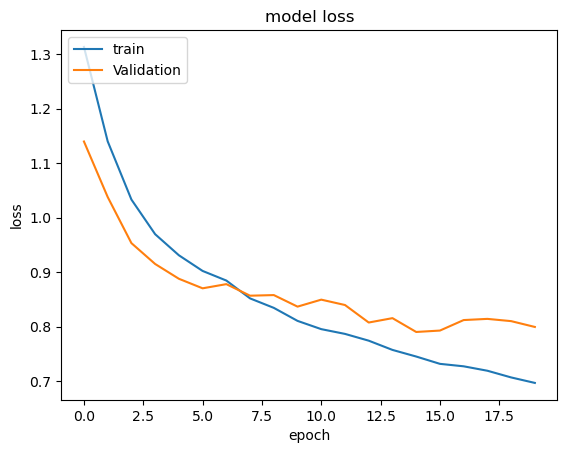

In [420]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

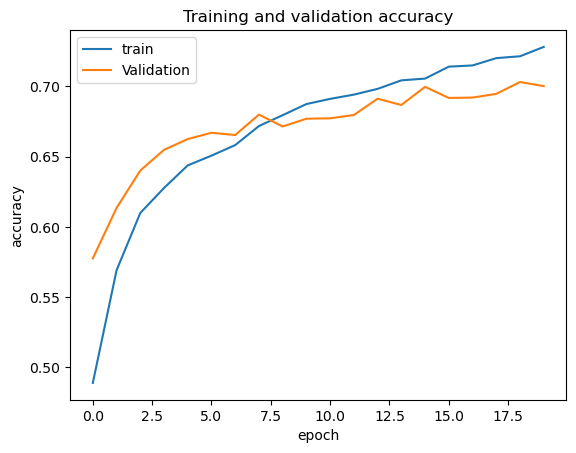

In [421]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

149/149 [==============================] - 2s 8ms/step
[[681   0   1  13   0   2   3  10]
 [  4 626  24   6   2   5   3   5]
 [  4   6 631  28   0   1   4   7]
 [  7   1   8 604   7 171  38  49]
 [  2   0   3  26 269  13  17  20]
 [  4   5   8 371  10 158  48  31]
 [  2   1  15  93   6  59 203  58]
 [  3   9  11  64  28  40  36 174]]
0.7062051498522584
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       710
           1       0.97      0.93      0.95       675
           2       0.90      0.93      0.91       681
           3       0.50      0.68      0.58       885
           4       0.84      0.77      0.80       350
           5       0.35      0.25      0.29       635
           6       0.58      0.46      0.51       437
           7       0.49      0.48      0.48       365

    accuracy                           0.71      4738
   macro avg       0.70      0.68      0.69      4738
weighted avg       0.70      0.71      0.70      

<Axes: >

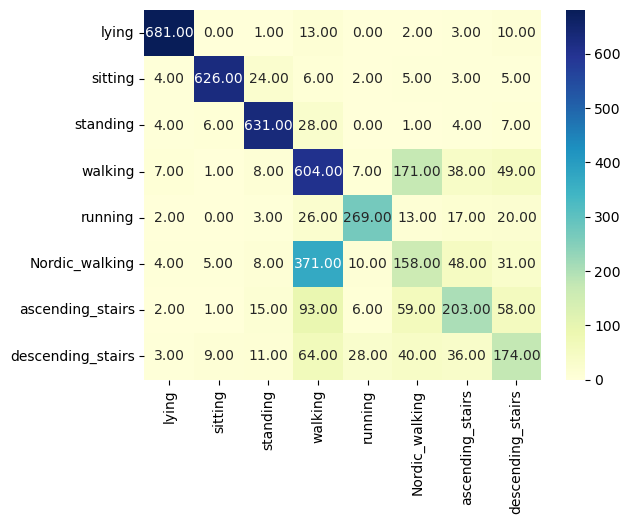

In [422]:
y_pred=new_model1.predict(X_test_c)
y_pred = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test_c, axis=-1)

LABELS = ['lying','sitting','standing','walking','running','Nordic_walking','ascending_stairs','descending_stairs']
cm=confusion_matrix(y_test2,y_pred)

print(cm)
print(accuracy_score(y_test2,y_pred))
print(classification_report(y_test2,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

## Train set: Chest / Test set: Chest

In [423]:
n_timesteps, n_features, n_outputs = X_train_c.shape[1], X_train_c.shape[2], y_train_c.shape[1]
print(n_timesteps, n_features, n_outputs)

15 12 8


In [424]:
model2 = Sequential()
model2.add(LSTM(64, input_shape = [n_timesteps, n_features], return_sequences=True))
model2.add(LSTM(32))
model2.add(Dropout(0.3))

model2.add(Dense(16, activation="relu"))
model2.add(Dropout(0.4))
model2.add(Dense(n_outputs, activation = "softmax"))

In [425]:
model2.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])
model2.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 15, 64)            19712     
                                                                 
 lstm_26 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_74 (Dense)            (None, 16)                528       
                                                                 
 dropout_40 (Dropout)        (None, 16)                0         
                                                                 
 dense_75 (Dense)            (None, 8)                 136       
                                                                 
Total params: 32792 (128.09 KB)
Trainable params: 327

In [426]:
history = model2.fit(X_train_c, y_train_c, batch_size= batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/30
237/237 [==============================] - 13s 33ms/step - loss: 1.6225 - accuracy: 0.3511 - val_loss: 1.2754 - val_accuracy: 0.4834
Epoch 2/30
237/237 [==============================] - 6s 25ms/step - loss: 1.2458 - accuracy: 0.5203 - val_loss: 1.0034 - val_accuracy: 0.6324
Epoch 3/30
237/237 [==============================] - 6s 24ms/step - loss: 1.0780 - accuracy: 0.5970 - val_loss: 0.9331 - val_accuracy: 0.6495
Epoch 4/30
237/237 [==============================] - 6s 24ms/step - loss: 1.0032 - accuracy: 0.6244 - val_loss: 0.8409 - val_accuracy: 0.6685
Epoch 5/30
237/237 [==============================] - 6s 25ms/step - loss: 0.9338 - accuracy: 0.6452 - val_loss: 0.8112 - val_accuracy: 0.6801
Epoch 6/30
237/237 [==============================] - 6s 25ms/step - loss: 0.8995 - accuracy: 0.6593 - val_loss: 0.8005 - val_accuracy: 0.6862
Epoch 7/30
237/237 [==============================] - 6s 24ms/step - loss: 0.8601 - accuracy: 0.6652 - val_loss: 0.7626 - val_accuracy: 0.699

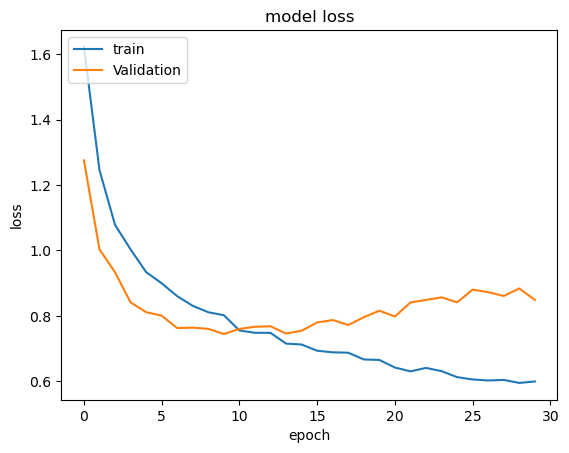

In [427]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

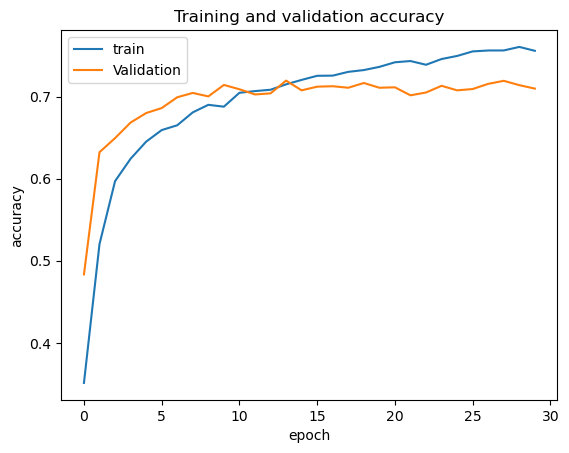

In [428]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

149/149 [==============================] - 2s 7ms/step
[[676   0   5  19   0   2   5   3]
 [  5 621  23  13   0   4   2   7]
 [  0   4 632  22   0   2  12   9]
 [  4   3  16 662   3 141  32  24]
 [  2   0   2  36 256  13  21  20]
 [  2   3  15 417   6 123  41  28]
 [  2   3  16 157   5  21 210  23]
 [  3  11   8  77  27  44  34 161]]
0.7051498522583368
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       710
           1       0.96      0.92      0.94       675
           2       0.88      0.93      0.90       681
           3       0.47      0.75      0.58       885
           4       0.86      0.73      0.79       350
           5       0.35      0.19      0.25       635
           6       0.59      0.48      0.53       437
           7       0.59      0.44      0.50       365

    accuracy                           0.71      4738
   macro avg       0.71      0.67      0.68      4738
weighted avg       0.71      0.71      0.70      

<Axes: >

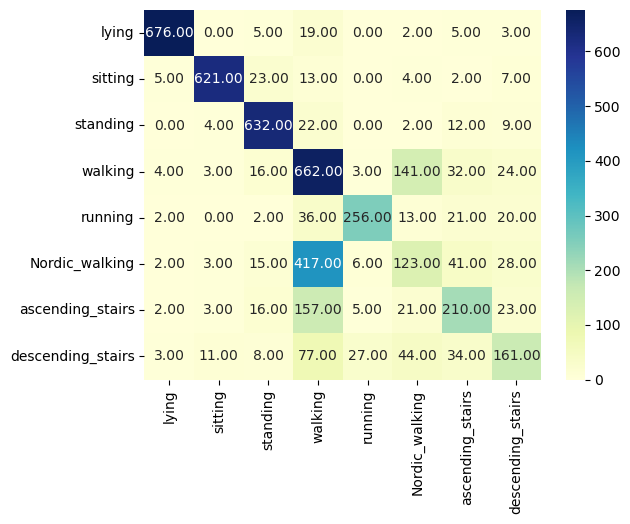

In [429]:
y_pred=model2.predict(X_test_c)
y_pred = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test_c, axis=-1)

LABELS = ['lying','sitting','standing','walking','running','Nordic_walking','ascending_stairs','descending_stairs']
cm=confusion_matrix(y_test2,y_pred)

print(cm)
print(accuracy_score(y_test2,y_pred))
print(classification_report(y_test2,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

## Train set: Chest / Test set: Hand

149/149 [==============================] - 1s 8ms/step
[[141 148  94 137   1  59  29 101]
 [ 31  18 175 291  29  59  18  54]
 [ 14  19  47 400   4  89  22  86]
 [ 73  22   8 316  37 115 136 178]
 [  4   7   4  52 119  46  59  59]
 [ 17  11  10 317  25 118  53  84]
 [ 30  19  11 162   4  74  72  65]
 [ 36  19  23 123   8  66  33  57]]
0.18742085268045588
              precision    recall  f1-score   support

           0       0.41      0.20      0.27       710
           1       0.07      0.03      0.04       675
           2       0.13      0.07      0.09       681
           3       0.18      0.36      0.24       885
           4       0.52      0.34      0.41       350
           5       0.19      0.19      0.19       635
           6       0.17      0.16      0.17       437
           7       0.08      0.16      0.11       365

    accuracy                           0.19      4738
   macro avg       0.22      0.19      0.19      4738
weighted avg       0.21      0.19      0.18     

<Axes: >

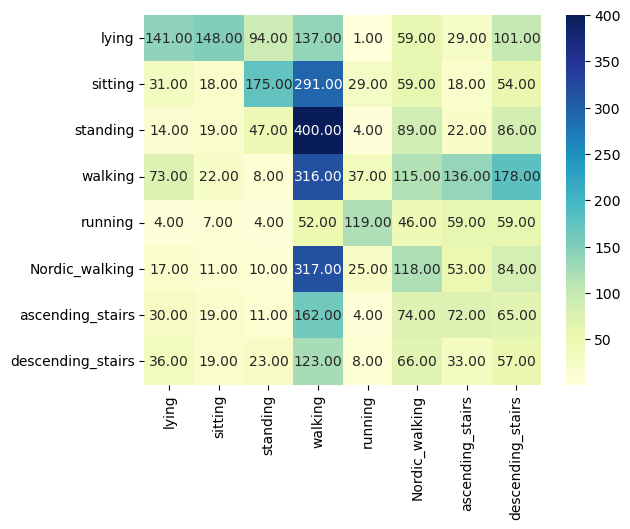

In [430]:
y_pred=model2.predict(X_test_h)
y_pred = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test_h, axis=-1)

LABELS = ['lying','sitting','standing','walking','running','Nordic_walking','ascending_stairs','descending_stairs']
cm=confusion_matrix(y_test2,y_pred)

print(cm)
print(accuracy_score(y_test2,y_pred))
print(classification_report(y_test2,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [431]:
pth_file2 = 'pamap2_chest.pth'
tf.keras.models.save_model(model2, pth_file2, include_optimizer=False)

INFO:tensorflow:Assets written to: pamap2_chest.pth\assets


INFO:tensorflow:Assets written to: pamap2_chest.pth\assets


## Fine tuning pretrained model with chest for hands model

In [432]:
base_model1 = keras.models.load_model(pth_file2)

In [433]:
print("Number of layers in the base model: ", len(base_model1.layers))
fine_tune_at = 2

for layer in base_model1.layers[:fine_tune_at]:
    layer.trainable = False

new_model2 = Sequential(base_model1.layers[:-1])
new_model2.add(Dense(16, activation="sigmoid"))
new_model2.add(Dropout(0.3))
new_model2.add(Dense(n_outputs, activation="sigmoid"))

new_model2.summary()

Number of layers in the base model:  6
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 15, 64)            19712     
                                                                 
 lstm_26 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_74 (Dense)            (None, 16)                528       
                                                                 
 dropout_40 (Dropout)        (None, 16)                0         
                                                                 
 dense_76 (Dense)            (None, 16)                272       
                                                                 
 dropout_41 (D

In [434]:
new_model2.compile(loss ="categorical_crossentropy", optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])

In [435]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model1.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_25,False
1,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_26,False
2,<keras.src.layers.regularization.dropout.Dropo...,dropout_39,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_74,True
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_40,True
5,<keras.src.layers.core.dense.Dense object at 0...,dense_75,True


In [436]:
history3 = new_model2.fit(X_train_h, y_train_h, batch_size= batch_size, epochs=20, validation_split=validation_split)

Epoch 1/20
237/237 [==============================] - 9s 20ms/step - loss: 1.9528 - accuracy: 0.2485 - val_loss: 1.8005 - val_accuracy: 0.3352
Epoch 2/20
237/237 [==============================] - 3s 14ms/step - loss: 1.8455 - accuracy: 0.3076 - val_loss: 1.7390 - val_accuracy: 0.3826
Epoch 3/20
237/237 [==============================] - 3s 14ms/step - loss: 1.7998 - accuracy: 0.3317 - val_loss: 1.6921 - val_accuracy: 0.4040
Epoch 4/20
237/237 [==============================] - 3s 14ms/step - loss: 1.7744 - accuracy: 0.3497 - val_loss: 1.6632 - val_accuracy: 0.4235
Epoch 5/20
237/237 [==============================] - 3s 14ms/step - loss: 1.7566 - accuracy: 0.3551 - val_loss: 1.6469 - val_accuracy: 0.4188
Epoch 6/20
237/237 [==============================] - 3s 14ms/step - loss: 1.7516 - accuracy: 0.3570 - val_loss: 1.6391 - val_accuracy: 0.4320
Epoch 7/20
237/237 [==============================] - 3s 14ms/step - loss: 1.7548 - accuracy: 0.3602 - val_loss: 1.6297 - val_accuracy: 0.4386

In [437]:
base_model1.trainable = True
new_model2.compile(loss ="categorical_crossentropy", optimizer = Adam(learning_rate=0.01), metrics=['accuracy'])

In [438]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model1.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_25,True
1,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_26,True
2,<keras.src.layers.regularization.dropout.Dropo...,dropout_39,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_74,True
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_40,True
5,<keras.src.layers.core.dense.Dense object at 0...,dense_75,True


In [439]:
history4 = new_model1.fit(X_train_h, y_train_h, epochs=20, batch_size = batch_size, validation_split = validation_split, shuffle = True)

Epoch 1/20
237/237 [==============================] - 6s 26ms/step - loss: 1.4781 - accuracy: 0.4802 - val_loss: 1.1507 - val_accuracy: 0.6239
Epoch 2/20
237/237 [==============================] - 6s 25ms/step - loss: 1.1245 - accuracy: 0.6122 - val_loss: 0.9940 - val_accuracy: 0.6896
Epoch 3/20
237/237 [==============================] - 6s 27ms/step - loss: 0.9981 - accuracy: 0.6665 - val_loss: 0.9438 - val_accuracy: 0.7089
Epoch 4/20
237/237 [==============================] - 6s 25ms/step - loss: 0.9217 - accuracy: 0.6924 - val_loss: 0.8956 - val_accuracy: 0.7199
Epoch 5/20
237/237 [==============================] - 6s 24ms/step - loss: 0.8732 - accuracy: 0.7089 - val_loss: 0.8772 - val_accuracy: 0.7321
Epoch 6/20
237/237 [==============================] - 6s 25ms/step - loss: 0.8205 - accuracy: 0.7273 - val_loss: 0.8648 - val_accuracy: 0.7355
Epoch 7/20
237/237 [==============================] - 6s 25ms/step - loss: 0.7997 - accuracy: 0.7346 - val_loss: 0.8298 - val_accuracy: 0.7424

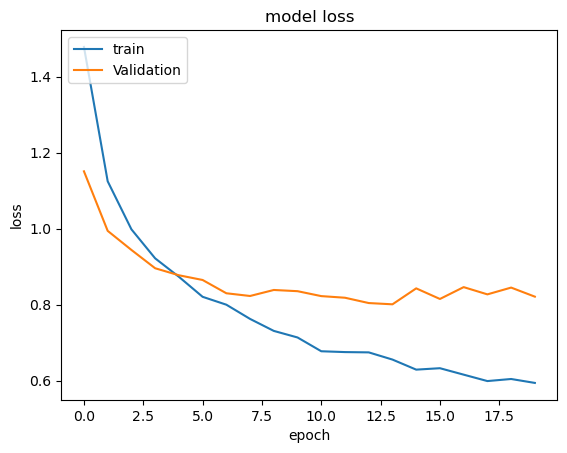

In [440]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

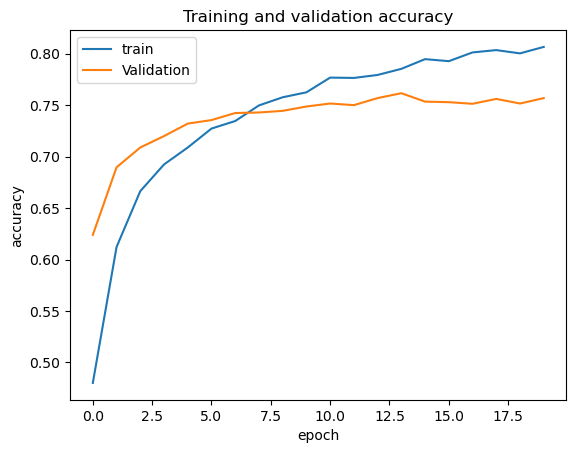

In [441]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

149/149 [==============================] - 2s 8ms/step
[[610  15  16  60   0   9   0   0]
 [ 65 339  61 104  10  96   0   0]
 [ 35  54 356 162   4  70   0   0]
 [ 46  16 118 586  43  76   0   0]
 [  8  14  19 137 145  27   0   0]
 [ 34  30  99 267  25 180   0   0]
 [ 35  18  82 245   9  48   0   0]
 [ 52  43  46 168  12  44   0   0]]
0.4677078936260025
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       710
           1       0.64      0.50      0.56       675
           2       0.45      0.52      0.48       681
           3       0.34      0.66      0.45       885
           4       0.58      0.41      0.48       350
           5       0.33      0.28      0.30       635
           6       0.00      0.00      0.00       437
           7       0.00      0.00      0.00       365

    accuracy                           0.47      4738
   macro avg       0.38      0.41      0.38      4738
weighted avg       0.41      0.47      0.42      

<Axes: >

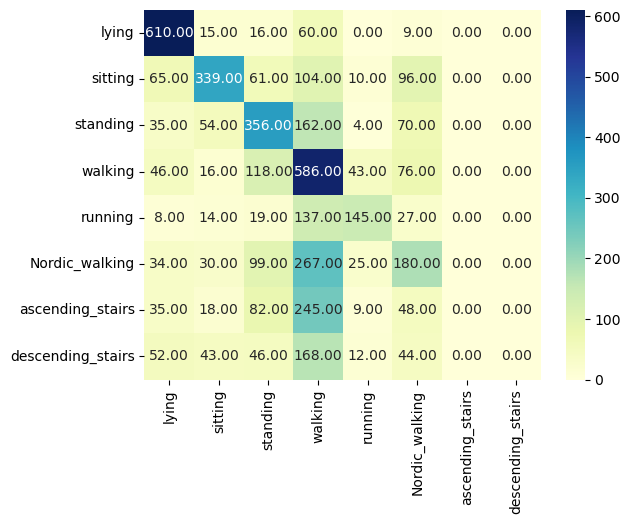

In [442]:
y_pred=new_model2.predict(X_test_h)
y_pred = np.argmax(y_pred, axis=-1)
y_test2 = np.argmax(y_test_h, axis=-1)

LABELS = ['lying','sitting','standing','walking','running','Nordic_walking','ascending_stairs','descending_stairs']
cm=confusion_matrix(y_test2,y_pred)

print(cm)
print(accuracy_score(y_test2,y_pred))
print(classification_report(y_test2,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

### Predict hand Data
#### Training data: hand -> Testing data: hand
Accuaracy: 74.92

#### Training data: chest -> Testing data: hand
Accuaracy: 18.74
#### Finetuning with hand data with pretrained_model by chest
Accuaracy: 46.77

-----------------------------------------------------------------------
### Predict chest Data
#### Training data: chest -> Testing data: chest
Accuaracy: 70.51

#### Training data: hand -> Testing data: chest
Accuaracy: 26.61
#### Finetuning with chest data with pretrained_model by hand
Accuaracy: 70.62
